In [60]:
import matplotlib.pyplot as plt
import pandas as pd
import pylab as pl
import numpy as np
%matplotlib inline

path = "~/Documents/Data Science/Data/UK used car/audi.csv"

df = pd.read_csv(path)
df.head()

,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize
0,A1,2017,12500,Manual,15735,Petrol,150,55.4,1.4
1,A6,2016,16500,Automatic,36203,Diesel,20,64.2,2.0
2,A1,2016,11000,Manual,29946,Petrol,30,55.4,1.4
3,A4,2017,16800,Automatic,25952,Diesel,145,67.3,2.0
4,A3,2019,17300,Manual,1998,Petrol,145,49.6,1.0


In [61]:
print(df.dtypes , df.isnull().sum())

model            object
year              int64
price             int64
transmission     object
mileage           int64
fuelType         object
tax               int64
mpg             float64
engineSize      float64
dtype: object model           0
year            0
price           0
transmission    0
mileage         0
fuelType        0
tax             0
mpg             0
engineSize      0
dtype: int64


In [62]:
transmission_dummies = pd.get_dummies(df["transmission"]) #Transmission Dummies
df = pd.concat((df,transmission_dummies),axis=1)
df[["Automatic","Manual","Semi-Auto"]].head()

,Automatic,Manual,Semi-Auto
0,False,True,False
1,True,False,False
2,False,True,False
3,True,False,False
4,False,True,False


In [63]:
fuel_type = pd.get_dummies(df["fuelType"])
df = pd.concat((df,fuel_type),axis=1)
df[["Petrol","Diesel"]].head()

,Petrol,Diesel
0,True,False
1,False,True
2,True,False
3,False,True
4,True,False


In [64]:
features = df[["year","mileage","tax","mpg","engineSize","Automatic","Manual","Semi-Auto","Petrol","Diesel"]]
features.dtypes

year            int64
mileage         int64
tax             int64
mpg           float64
engineSize    float64
Automatic        bool
Manual           bool
Semi-Auto        bool
Petrol           bool
Diesel           bool
dtype: object

In [65]:
correlation_matrix = features.corrwith(df["price"])
correlation_matrix

year          0.592581
mileage      -0.535357
tax           0.356157
mpg          -0.600334
engineSize    0.591262
Automatic     0.264294
Manual       -0.483137
Semi-Auto     0.259356
Petrol       -0.033733
Diesel        0.030452
dtype: float64

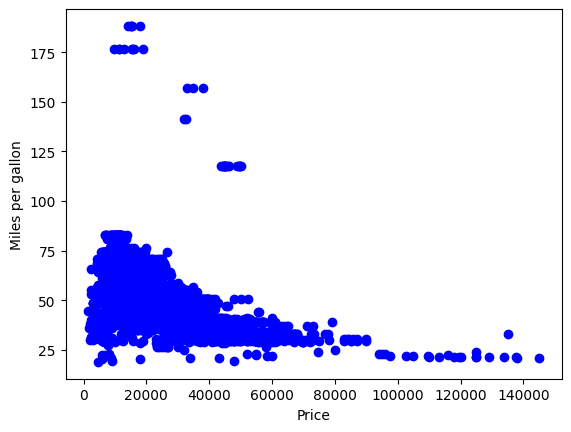

In [66]:

plt.scatter(df.price,df.mpg,color="blue")
plt.xlabel("Price")
plt.ylabel("Miles per gallon")
plt.show()

In [67]:
feature = df[["price","mpg"]]

In [68]:
rnd = np.random.rand(len(features)) < 0.8
train = feature[rnd]
test = feature[~rnd]

In [69]:
from sklearn import linear_model
lreg = linear_model.LinearRegression()
train_x = np.asanyarray(feature[["mpg"]])
train_y = np.asanyarray(feature[["price"]])
lreg.fit(train_x,train_y)

print ('Coefficients: ', lreg.coef_)
print ('Intercept: ',lreg.intercept_)

Coefficients:  [[-543.08424983]]
Intercept:  [50469.08462089]


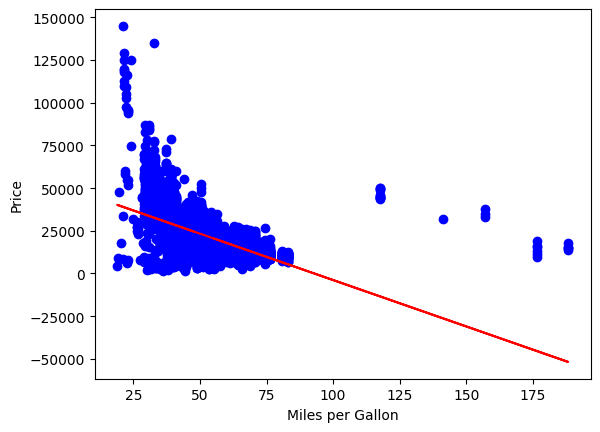

In [70]:
plt.scatter(train.mpg,train.price, color = "blue")
plt.plot(train_x,lreg.coef_[0][0]*train_x + lreg.intercept_[0],"-r")
plt.xlabel("Miles per Gallon")
plt.ylabel("Price")
plt.show()

In [71]:
from sklearn.metrics import r2_score

test_x = np.asarray(test[["mpg"]])
test_y = np.asarray(test[["price"]])
yhat = lreg.predict(test_x)

print("Mean Absolute Error: %.2f" % np.mean(np.absolute(test_y - yhat)))
print("Residual sum of squares (MSE): %.2f" % np.mean((test_y - yhat))**2)
print("R2-score: %.2f" % r2_score(test_y, yhat))

Mean Absolute Error: 5961.61
Residual sum of squares (MSE): 23779.85
R2-score: 0.36
